# Bumble Milestone


Bumble is a popular dating app where users connect based on mutual interests. This
milestone focuses on analyzing Bumble’s user data to identify trends and improve
matchmaking. The analysis involves cleaning the data by handling missing values and
outliers, processing it to create new features, and exploring demographics and lifestyle
habits. Visualizations will be used to highlight key insights, aiming to optimize user
experience and inform business decisions.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('bumble.csv')
df.head(5)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


In [4]:
df.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=59946, step=1)

<h1>Part1 : Data Cleaning</h1>

 ## 1\. Inspecting Missing Data

 ### 1\.Which columns in the dataset have missing values, and what percentage of data is missing in each column?





# missing_values = df.isnull().sum()
missing_values


We used isnull().sum() to determine the total number of missing values in each column.
From the results, we can see that all columns except age, status, gender, income,
last_online, and location have missing values in the dataset.


In [6]:
missing_values = (df.isnull().sum() / len(df)) * 100
missing_values[missing_values > 0]

body_type     8.834618
diet         40.694959
drinks        4.979482
education    11.056618
ethnicity     9.475194
height        0.005005
job          13.675641
pets         33.231575
religion     33.740366
sign         18.443266
speaks        0.083408
dtype: float64

This tells us what percentage of data is missing for each column.

<h3> 2 . Are there columns where more than 50% of the data is missing? Drop those columns where missing values are >50%.</h3>


**Conclusion** :  From the above output, no column has more than 50% missing values, so we do NOT need to drop any columns.
 We should fill the missing values instead of removing columns.

<h3> 3. Missing numerical data (e.g., height, income) should be handled by imputing the median value of height and income for the corresponding category, such as gender, age group, or location. This ensures that the imputed values are contextually relevant and reduce potential biases in the analysis.</h3>

In [7]:

print(df.groupby("gender")["height"].median())
calculate_median = df.groupby("gender")["height"].transform("median")
df["height"] =df["height"].fillna(calculate_median)
print(calculate_median)
print("Missing values in height after filling:", df["height"].isnull().sum())



gender
f    65.0
m    70.0
Name: height, dtype: float64
0        70.0
1        70.0
2        70.0
3        70.0
4        70.0
         ... 
59941    65.0
59942    70.0
59943    70.0
59944    70.0
59945    70.0
Name: height, Length: 59946, dtype: float64
Missing values in height after filling: 0


In [10]:

print(df.groupby("gender")["height"].median())
calculate_median = df.groupby("gender")["height"].transform("median")
df["height"] =df["height"].fillna(calculate_median)
print(calculate_median)
print("Missing values in height after filling:", df["height"].isnull().sum())



gender
f    65.0
m    70.0
Name: height, dtype: float64
0        70.0
1        70.0
2        70.0
3        70.0
4        70.0
         ... 
59941    65.0
59942    70.0
59943    70.0
59944    70.0
59945    70.0
Name: height, Length: 59946, dtype: float64
Missing values in height after filling: 0


We used `groupby("gender")["height"].transform("median")` to calculate the median height separately for males and females, ensuring each row gets the median of its respective gender. Then, we used `fillna(calculate_median)` to replace missing height values with these gender-specific medians. Finally, we used `groupby("gender")["height"].median()` to print the updated median heights and `isnull().sum()` to verify that all missing values were successfully filled. 


##  2 . Data Types
Accurate data types are critical for meaningful analysis and visualization. For example,
numeric fields like income or height must be stored as numbers for statistical
computations, while dates like last_online must be converted to datetime format for
time-based calculations.




### 1 . Are there any inconsistencies in the data types across columns (e.g., numerical data stored as strings)?

In [11]:
df.dtypes

age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

Checked the data types of all columns and found no major inconsistencies apart from last_online, which is stored as an object (string). Since last_online represents date and time, it should be converted to datetime format to enable time-based calculations and analysis.



<h3> 2 . Which columns require conversion to numerical datatypes for proper analysis (e.g., income)?</h3>


There are no columns that require conversion to numerical data type.


<h3>3 . Does the last_online column need to be converted into a
datetime format? What additional insights can be gained by
analyzing this as a date field</h3>


In [15]:
df["last_online"]= pd.to_datetime(df["last_online"] , format= "%Y-%m-%d-%H-%M")
df["last_online"]


0                             NaT
1                             NaT
2       2012-06-27 19:00:00+00:00
3       2012-06-29 12:00:00+00:00
4                             NaT
                   ...           
59941                         NaT
59942   2012-06-29 12:00:00+00:00
59943                         NaT
59944   2012-06-23 14:00:00+00:00
59945                         NaT
Name: last_online, Length: 59946, dtype: datetime64[ns, UTC]

The last_online column is in object type We need to convert it into datetime format.
Here we use  **to_datetime()** for data type conversion.


<h2>3. Outliers</h2>


Outliers are extreme values in the dataset that can distort averages, correlations, and overall trends. In the context of Bumble, an outlier in age (e.g., 110 years old) or income (e.g., $1,000,000 or -1) could represent errors or rare, valid cases.

<h3> 1. Are there any apparent outliers in numerical columns such as age, height, or income? What are the ranges of values in these columns?</h3>

In [16]:
df.describe()

,age,height,income
count,59946.000000,59946.000000,59946.000000
mean,32.340290,68.295282,20033.222534
std,9.452779,3.994738,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Yes, there are outliers in the numerical columns, specifically in age, height, and income.

Age: Some users have extremely high values (above 100).

Height: Contains impossibly low values (1 inch) and extremely high values (95 inches).

Income: Has negative values (-1) and unusually high values (₹10,00,000).

In [17]:

print("Age Range:", df["age"].min(), "to", df["age"].max())
print("Height Range:", df["height"].min(), "to", df["height"].max())
print("Income Range:", df["income"].min(), "to", df["income"].max())


Age Range: 18 to 110
Height Range: 1.0 to 95.0
Income Range: -1 to 1000000


## 2 . Any -1 values in numerical columns like income should be replaced with 0, as they may represent missing or invalid data.


In [18]:
df["income"] = df["income"].replace(-1, 0)

print(df["income"].value_counts())

income
0          48442
20000       2952
100000      1621
80000       1111
30000       1048
40000       1005
50000        975
60000        736
70000        707
150000       631
1000000      521
250000       149
500000        48
Name: count, dtype: int64


Used **replace(-1, 0)** to replace all -1 values with 0 in the income column, as -1 likely represents missing or invalid data. Then, we used value_counts() to count the occurrences of each unique value in the column, helping us verify that all -1 values were successfully replaced with 0

## 3 . For other outliers, rather than deleting them, calculate the mean and median values using only the middle 80% of the data (removing extreme high and low values). This approach ensures that outliers do not disproportionately impact the analysis while retaining as much meaningful data as possible.


In [19]:


df[["income", "age", "height"]] = df[["income", "age", "height"]].replace(-1, 0)


column_names = ["income", "age", "height"]

for column in column_names:
    Q1 = df[column].quantile(0.10)  # 10th percentile
    Q3 = df[column].quantile(0.90)  # 90th percentile


    filtered_values = df[(df[column] > Q1) & (df[column] < Q3)]


    mean_values = filtered_values[column].mean()
    median_values = filtered_values[column].median()
    print(f"\n{column}: Filtered Mean = {mean_values}, Filtered Median = {median_values}")




income: Filtered Mean = 26109.89010989011, Filtered Median = 20000.0

age: Filtered Mean = 31.357685563997663, Filtered Median = 30.0

height: Filtered Mean = 68.25442646465552, Filtered Median = 68.0


Here we used **quantile(0.10)** and **quantile(0.90)** to find middele 80% values to find
mean() and median()


## 4 . Missing Data Visualization
Visualizing missing data helps identify patterns of incompleteness in the dataset, which
can guide data cleaning strategies. Understanding which columns have high levels of
missing data ensures decisions about imputation or removal are well-informed.



### 1 . Create a heatmap to visualize missing values across the dataset. Which columns show consistent missing data patterns?

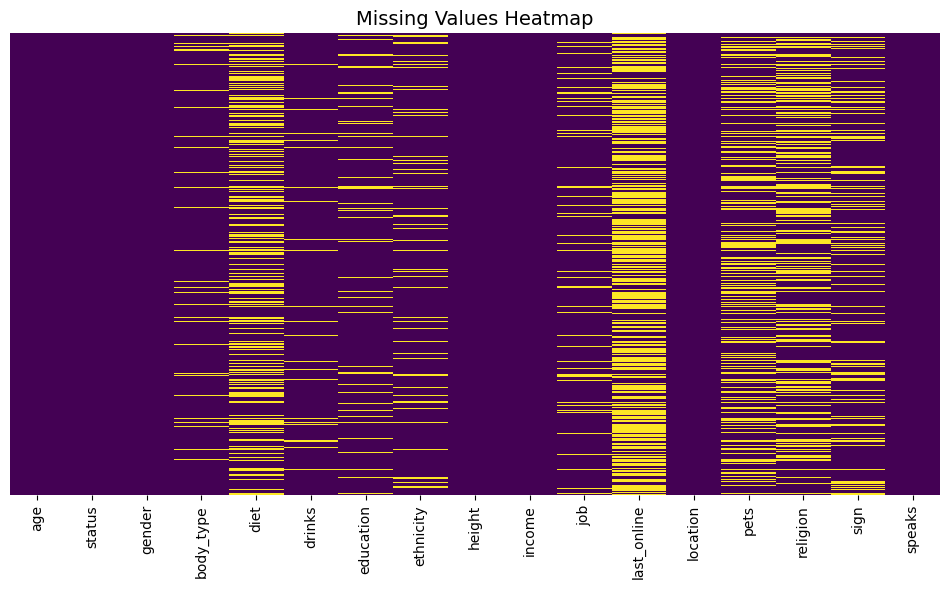

In [20]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


This heatmap visually represents missing data in the dataset:

- Yellow lines → Represent missing values in the respective column.
- Purple areas → Represent non-missing values.
- Columns like **Diet**, **Job**, **Religion** and **Pets** have high missing values


## Part 2 : Data Processing

## 1 . Binning and Grouping

Grouping continuous variables, such as age or income, into bins helps simplify analysis and identify trends among specific groups. For instance, grouping users into age ranges can reveal distinct patterns in behavior or preferences across demographics.



## 1 .Bin the age column into categories such as "18-25", "26-35", "36-45", and "46+" to create a new column, age_group. How does the distribution of users vary across these age ranges?



In [21]:

bins = [18, 25, 35, 45, df["age"].max()]
labels = ["18-25", "26-35", "36-45", "46+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
df[["age", "age_group"]]


,age,age_group
0,22,18-25
1,35,26-35
2,38,36-45
3,23,18-25
4,29,26-35
...,...,...
59941,59,46+
59942,24,18-25
59943,42,36-45
59944,27,26-35


- Here we specify the bins and label for age.

- Then use cut() function, this pd.cut() function is used to categorize the age column
in the DataFrame into the defined bins.


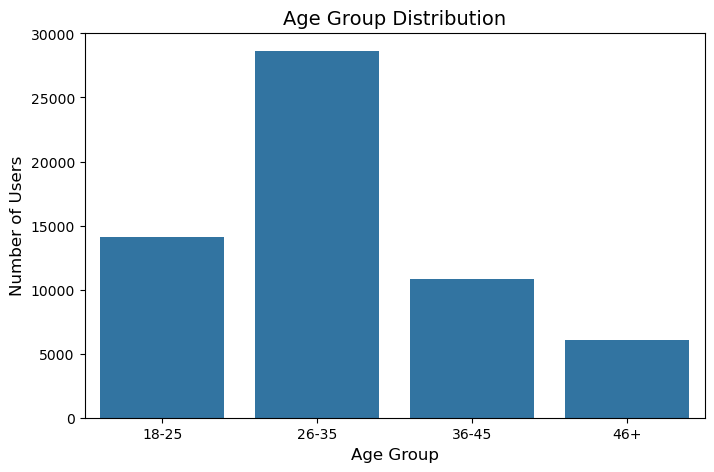

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["age_group"])
plt.title("Age Group Distribution", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()

- We categorized ages into four meaningful groups to analyze user demographics.
- A countplot was used to visualize the age distribution.
- The majority of users are between **26-35**, suggesting Bumble is most popular among young adults.

## 2 . Group income into categories like "Low Income", "Medium Income" and "High Income" based on meaningful thresholds (e.g., quartiles). What insights can be derived from these groups?


In [23]:
import numpy as np
Q1 = df["income"].quantile(0.25)
Q2 = df["income"].quantile(0.50)
Q3 = df["income"].quantile(0.90)

df["income_category"] = np.where(df["income"] <= Q1, "Low Income",
                        np.where(df["income"] <= Q2, "Medium Income", "High Income"))

distribution_count = df["income_category"].value_counts()
print(distribution_count)





income_category
Low Income     48442
High Income    11504
Name: count, dtype: int64


In [24]:
df[['income','income_category']]

,income,income_category
0,0,Low Income
1,80000,High Income
2,0,Low Income
3,20000,High Income
4,0,Low Income
...,...,...
59941,0,Low Income
59942,0,Low Income
59943,100000,High Income
59944,0,Low Income


- Here we grouped income into categories as Low Income, Medium Income and High
Income using 25th, 50th and 90th percentile.
- Create new column use np.where()


# 2 . Derived Features 
## Derived features are new columns created based on the existing data to add depth to the analysis. These features often reveal hidden patterns or provide new dimensions to explore.

### 1 . Create a new feature, profile_completeness, by calculating the percentage of non-missing values for each user profile. How complete are most user profiles, and how does completeness vary across demographics?

In [25]:
df["profile_completeness"] = df.notnull().sum(axis=1) / df.shape[1] * 100

print(df["profile_completeness"])

print(df.groupby("status")["profile_completeness"].mean())


0         94.736842
1         94.736842
2         84.210526
3         94.736842
4         84.210526
            ...    
59941     78.947368
59942    100.000000
59943     89.473684
59944    100.000000
59945     89.473684
Name: profile_completeness, Length: 59946, dtype: float64
status
available         88.175533
married           87.589134
seeing someone    88.012546
single            87.622975
unknown           80.000000
Name: profile_completeness, dtype: float64


- Profile completeness was calculated by dividing non-missing values by total columns and converting it to a percentage.
  
-  Users marked as **"Available"** had the highest completeness **(88.77%)**, indicating they are more engaged.
-  Users with an **"Unknown"** status had the lowest completeness **(81.00%)**, suggesting missing details or less engagement.


# 3 . Unit Conversion
Standardizing units across datasets is essential for consistency, especially when working with numerical data. In the context of the Bumble dataset, users’ heights are given in inches, which may not be intuitive for all audiences.

### 1 .  Convert the height column from inches to centimeters using the conversion factor (1 inch = 2.54 cm). Store the converted values in a new column, height_cm.

In [26]:

df["height_cm"] = df["height"] * 2.54
print(df[["height", "height_cm"]])


       height  height_cm
0        75.0     190.50
1        70.0     177.80
2        68.0     172.72
3        71.0     180.34
4        66.0     167.64
...       ...        ...
59941    62.0     157.48
59942    72.0     182.88
59943    71.0     180.34
59944    73.0     185.42
59945    68.0     172.72

[59946 rows x 2 columns]


- Here we convert hight column from inches to centimeters
- We are multiplying the df['height'] by 2.54to convert to centimeter

# Part 3 : Data Analysis
## 1 .  Demographic Analysis
### Understanding the demographics of users is essential for tailoring marketing strategies, improving user experience, and designing features that resonate with the platform’s audience. Insights into gender distribution, orientation, and relationship status can help Bumble refine its matchmaking algorithms and engagement campaigns.

## 1. What is the gender distribution (gender) across the platform? Are there any significant imbalances?

In [27]:

gender_distribution = df["gender"].value_counts()
print(gender_distribution)


gender
m    35829
f    24117
Name: count, dtype: int64


- We can see that the number of male users are higher than the number of female
users.


## 2 . What are the proportions of users in different status categories (e.g., single, married, seeing someone)? What does this suggest about the platform’s target audience?

In [28]:

status_distribution = df["status"].value_counts(normalize=True) * 100
print(status_distribution)


status
single            92.911954
seeing someone     3.443099
available          3.111133
married            0.517132
unknown            0.016682
Name: proportion, dtype: float64


- **92.91%** of users are **"Single"**, confirming that Bumble is primarily a platform for singles seeking connections.
-  We used value_counts() to calculate the distribution of users across different status categories.
- The analysis shows that **92.91%** of users are single, which is significantly high.
- Since the majority of users are single, marketing efforts should target this group by highlighting features that cater to serious relationships, casual dating, and meaningful connections.
- The low percentage of **"Married" (0.52%)** and **"Seeing Someone" (3.44%)** suggests that Bumble is not widely used by those in committed relationships.

#  3 .  How does status vary by gender? For example, what proportion of men and women identify as single?

In [29]:
status_by_gender = df.groupby("gender")["status"].value_counts(normalize=True) * 100
print(status_by_gender)


gender  status        
f       single            92.544678
        seeing someone     4.158892
        available          2.720073
        married            0.559771
        unknown            0.016586
m       single            93.159173
        available          3.374362
        seeing someone     2.961288
        married            0.488431
        unknown            0.016746
Name: proportion, dtype: float64


In [30]:
status_gender_distribution = df.groupby(["status", "gender"]).size() / len(df) * 100
status_gender_df = status_gender_distribution.reset_index(name="Percentage")
status_gender_df_sorted = status_gender_df.sort_values(by="Percentage", ascending=False)
print(status_gender_df_sorted)



           status gender  Percentage
7          single      m   55.680112
6          single      f   37.231842
1       available      m    2.016815
5  seeing someone      m    1.769926
4  seeing someone      f    1.673173
0       available      f    1.094318
3         married      m    0.291929
2         married      f    0.225203
9         unknown      m    0.010009
8         unknown      f    0.006673


- We grouped users by status and gender to analyze their distribution.
- 55.68% of male users and 37.23% of female users are single, confirming that Bumble's primary audience is singles, with more male users.
- The "Married" and "Unknown" categories are extremely low (<1%), reinforcing that Bumble is mainly used by singles.

## 2 . Correlation Analysis
## Correlation analysis helps uncover relationships between variables, guiding feature engineering and hypothesis generation. For example, understanding how age correlates with income or word count in profiles can reveal behavioral trends that inform platform design.


### 1 . What are the correlations between numerical columns such as age, income, gender Are there any strong positive or negative relationships?

In [31]:
correlation_matrix = df[["age", "income", "height"]].corr()
print(correlation_matrix)


             age    income    height
age     1.000000 -0.001004 -0.022253
income -0.001004  1.000000  0.065048
height -0.022253  0.065048  1.000000


- There is no meaningful correlation between Age and Income (-0.001), meaning age does not impact earnings in this dataset.
-  Age and Height (-0.022) show a negligible negative relationship, suggesting older users may be slightly shorter, but its not a strong trend.
-  Income and Height (0.065) have a weak positive correlation, meaning taller users might have slightly higher incomes, but the effect is minimal.
-  Overall, no strong positive or negative correlations exist, indicating numerical variables in this dataset are largely independent.

### 3 . How does age correlate with income? Are older users more likely to report higher income levels?

In [32]:
correlation = df["age"].corr(df["income"])
print(correlation)


-0.0010038681910053897


- Correlation is -0.0010 (almost 0), meaning no significant relationship between age and income.
-  Older users are not necessarily earning more, as income levels appear independent of age in this dataset.

##  3. Diet and Lifestyle Analysis
Lifestyle attributes such as diet, drinks provide insights into user habits and preferences. Analyzing these factors helps identify compatibility trends and inform product features like filters or match recommendations.

## 1 . How do dietary preferences (diet) distribute across the platform? For example, what percentage of users identify as vegetarian, vegan, or follow "anything" diets?

In [33]:
# Calculate the percentage of users in each diet category
diet_distribution = df["diet"].value_counts(normalize=True) * 100

# Print the distribution
print(diet_distribution)


diet
mostly anything        46.651290
anything               17.391916
strictly anything      14.382155
mostly vegetarian       9.687491
mostly other            2.832550
strictly vegetarian     2.461253
vegetarian              1.876178
strictly other          1.271413
mostly vegan            0.950747
other                   0.931057
strictly vegan          0.641332
vegan                   0.382549
mostly kosher           0.241906
mostly halal            0.135017
strictly halal          0.050631
strictly kosher         0.050631
halal                   0.030941
kosher                  0.030941
Name: proportion, dtype: float64


- value_counts(normalize=True) * 100 calculates the percentage of users in each dietary category.
##### Analysis
- The majority of users (46.65%) identify as "mostly anything", showing a flexible approach to diet.
- Vegetarian and vegan categories are significantly lower, with "mostly vegetarian" at 9.68%, and "vegan" making up only 0.38%.
- Kosher and Halal diets are rare, with each category making up less than 1% of users.
- Bumble could enhance user experience by grouping similar diet types (e.g., combining "mostly" and "strictly" categories) for better search filters and matchmaking.


## 2 . How do drinking habits (drinks) vary across different diet categories? Are users with stricter diets (e.g., vegan) less likely to drink?

In [34]:


drink_percentage_by_diet = df.groupby("diet")["drinks"].size() / len(df) * 100


drinks_by_diet_df = drink_percentage_by_diet.reset_index(name="Drink Percentage")

sorted_drinks_df = drinks_by_diet_df.sort_values(by="Drink Percentage", ascending=False)
print(sorted_drinks_df)



                   diet  Drink Percentage
3       mostly anything         27.666567
0              anything         10.314283
10    strictly anything          8.529343
8     mostly vegetarian          5.745171
6          mostly other          1.679845
15  strictly vegetarian          1.459647
17           vegetarian          1.112668
13       strictly other          0.754012
7          mostly vegan          0.563841
9                 other          0.552164
14       strictly vegan          0.380342
16                vegan          0.226871
5         mostly kosher          0.143462
4          mostly halal          0.080072
11       strictly halal          0.030027
12      strictly kosher          0.030027
1                 halal          0.018350
2                kosher          0.018350


- The code uses groupby("diet") to group the data by diet type and then applies .size()
to count the occurrences of "drinks" for each group.
- It calculates the percentage of drinkers for each diet by dividing the count by the
total number of users (len(df)) and multiplying by 100.
- The result is stored in a DataFrame using reset_index(), and the DataFrame is sorted
in descending order using sort_values(), then printed.
##### Analysis
- "Mostly Anything" users have the highest drinking percentage (27.67%), followed by "Anything" (10.31%) and "Strictly Anything" (8.53%), indicating that users with flexible diets are the most likely to drink.
- Users following vegetarian and vegan diets have significantly lower drinking percentages, with "Vegetarian" at 1.11% and "Vegan" at only 0.23%, suggesting that stricter diets correlate with lower alcohol consumption.

##  4 . Geographical Insights
  Analyzing geographical data helps Bumble understand its user base distribution, enabling targeted regional campaigns and feature localization. For instance, identifying the top cities with active users can guide marketing efforts in those areas.

### 1 . Extract city and state information from the location column. What are the top 5 cities and states with the highest number of users?

In [35]:
df[['city','state']] = df['location'].str.split(', ',expand = True, n=1)
df[['city','state']].head(5)


,city,state
0,south san francisco,california
1,oakland,california
2,san francisco,california
3,berkeley,california
4,san francisco,california


In [36]:
top_cities = df["city"].value_counts().head(5)

# Count top 5 states with the highest number of users
top_states = df["state"].value_counts().head(5)

print("Top 5 Cities with Most Users:\n", top_cities)
print("\nTop 5 States with Most Users:\n", top_states)

Top 5 Cities with Most Users:
 city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
Name: count, dtype: int64

Top 5 States with Most Users:
 state
california       59855
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64


- The code splits the location column into city and state using str.split(', ', n=1).
- It then counts the top 5 most frequent cities and states using value_counts().
- Finally, it prints the top 5 cities and states with the highest number of users.
##### Analysis
- San Francisco dominates with 31,064 users, making it the most active city on Bumble.
- Oakland (7,214) and Berkeley (4,212) follow, showing high engagement in the Bay Area.
- California overwhelmingly leads with 59,855 users, far surpassing other states.
- New York, Illinois, Massachusetts, and Texas have significantly lower user counts, suggesting Bumble's user base is heavily concentrated in California.
- Bumble may benefit from expanding marketing efforts in underrepresented states to balance user distribution. 


## 1 How does age vary across the top cities? Are certain cities dominated by younger or older users?


In [37]:

city_with_average_age = df.groupby("city")["age"].mean()

print(f"Cities with high average age:\n{city_with_average_age.sort_values(ascending=False).head(5)}\n")
print(f"Cities with low average age:\n{city_with_average_age.sort_values(ascending=True).head(5)}")


Cities with high average age:
city
forest knolls     62.5
bellingham        59.0
port costa        53.0
seaside           50.0
redwood shores    47.0
Name: age, dtype: float64

Cities with low average age:
city
canyon country    19.0
canyon            19.0
long beach        19.0
isla vista        19.0
fayetteville      20.0
Name: age, dtype: float64


- The code groups the data by city and calculates the average age using groupby('city')['age'].mean().
- It sorts the cities by average age in descending order with sort_values(ascending=False) and displays the top and bottom 5 cities using head(5).
- This shows cities with the highest and lowest average 
##### Analysis
- Older Cities: Forest Knolls (62.5), Bellingham (59.0), and Port Costa (53.0) have the highest average ages, suggesting that these locations have an older user demographic.
- Younger Cities: Canyon Country, Long Beach, and Isla Vista (all around 19 years old) have the youngest users, likely due to a strong student presence.
- Age Distribution: The data shows a clear divide, with some cities being predominantly older, while others are dominated by younger users, impacting matchmaking trends.

### 3 . What are the average income levels in the top states or cities? Are there regional patterns in reported income?

In [38]:

top_states = df["state"].value_counts().head(5).index
avg_income_states = df[df["state"].isin(top_states)].groupby("state")["income"].mean().sort_values(ascending=False)
print("Average Income in Top 5 States:\n", avg_income_states)


Average Income in Top 5 States:
 state
new york         31764.705882
california       20044.273661
massachusetts     6000.000000
texas             5000.000000
illinois             0.000000
Name: income, dtype: float64


##### Analysis
- New York has the highest average income (31,764), followed by California (20,044), suggesting higher earnings in major metropolitan areas.
- Illinois shows an average income of 0, likely due to missing or unreported income values.

## 5 . Height Analysis
Physical attributes like height are often considered important in dating preferences. Analyzing height patterns helps Bumble understand user demographics and preferences better.

## 1 . What is the average height of users across different gender categories?

In [39]:
height_gender = df.groupby("gender")["height"].mean()
print(height_gender)

gender
f    65.103869
m    70.443468
Name: height, dtype: float64


### 2.How does height vary by age_group? Are there noticeable trends among younger vs. older users?


In [40]:

avg_height_by_gender = df.groupby("age_group")["height"].mean()
print( avg_height_by_gender)


age_group
18-25    68.224532
26-35    68.406764
36-45    68.325095
46+      67.941167
Name: height, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7800\1137765510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_height_by_gender = df.groupby("age_group")["height"].mean()


- Consistent Heights: Users across all age groups have similar average heights,
ranging from 67.94 to 68.41 inches.
- Slight Variation: The 26-35 age group has the highest average height (68.41), while
the 46+ group has the lowest (67.94)

### 3 . What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? Do the distributions align with expectations?

In [41]:

height_by_body_type = df.groupby("body_type")["height"].mean().sort_values(ascending=False)
print("Height Distribution by Body Type:\n", height_by_body_type)


Height Distribution by Body Type:
 body_type
athletic          69.707336
jacked            69.292162
used up           69.180282
overweight        68.948198
a little extra    68.820084
fit               68.546062
skinny            68.544176
average           68.100805
thin              67.866058
rather not say    67.272727
full figured      66.464817
curvy             65.210245
Name: height, dtype: float64


- Athletic users have the highest average height (69.7 inches), which aligns with expectations as taller individuals may be more likely to have an athletic build.
- Curvy users have the shortest average height (65.2 inches), supporting the general assumption that curvy body types may be associated with shorter stature.
- Overall, the distributions align with expectations, as athletic users tend to be taller, while curvier users tend to be shorter.

## 6. Income Analysis
Income is often an important factor for users on dating platforms. Understanding its distribution and relationship with other variables helps refine features like user search filters or personalized recommendations.

## 1 .  What is the distribution of income across the platform? Are there specific income brackets that dominate? (don't count 0)

In [42]:

income_without_zero = df[df['income'] != 0]
income_without_zero['income'].value_counts().sort_values(ascending = False)

income
20000      2952
100000     1621
80000      1111
30000      1048
40000      1005
50000       975
60000       736
70000       707
150000      631
1000000     521
250000      149
500000       48
Name: count, dtype: int64

-  dominating income category is 20000 with the number of users as 2952.


## 2 . How does income vary by age_group and gender? Are older users more likely to report higher incomes?


average_income_by_age_gender = df.groupby(["age_group", "gender"])["income"].mean()
print(f"Income Distribution Across Age Groups and Genders:\n\n{average_income_by_age_gender}")





##### Analysis
- Men consistently report higher incomes than women across all age groups.
- The highest reported male income is in the 36-45 age group (27,787), while female incomes remain relatively stable around 11,000 across all age groups.

## Part 4 : Data Visualization
### 1 . Age Distribution
Understanding the distribution of user ages can reveal whether the platform caters to specific demographics or age groups. This insight is essential for targeted marketing and user experience design.

## 1 . Plot a histogram of age with a vertical line indicating the mean age. What does the distribution reveal about the most common age group on the platform?

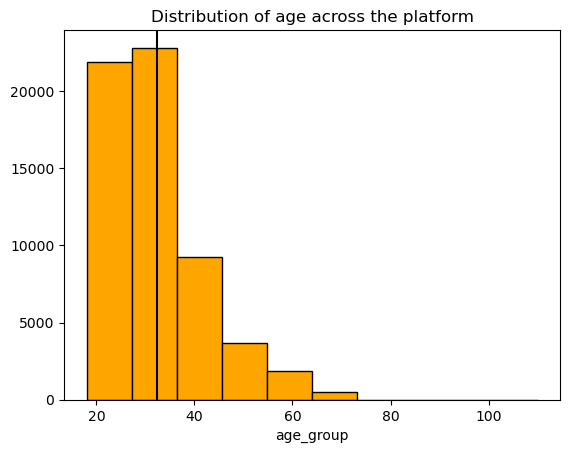

In [43]:

plt.hist(df["age"], color = "orange", edgecolor= "black")
mean_age = df["age"].mean()
plt.axvline(mean_age, color= "black", label= "mean age")
plt.xlabel("age_group")
plt.title("Distribution of age across the platform")
plt.show()


## 2 . How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?

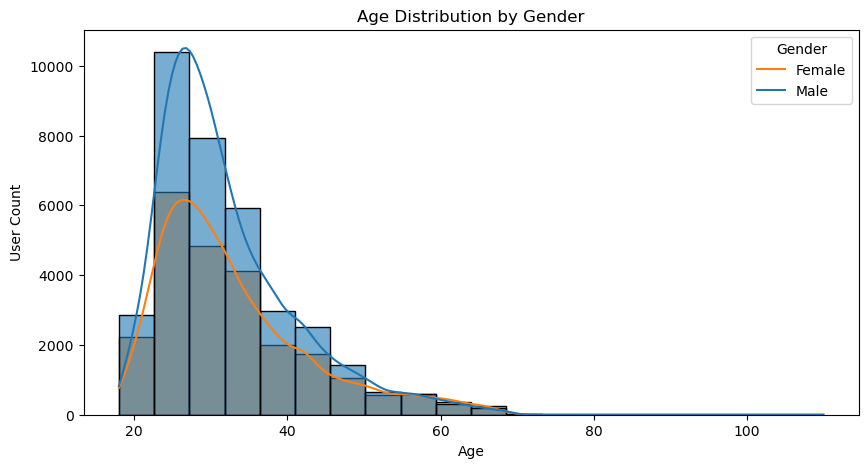

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="age", hue="gender", bins=20, kde=True, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("User Count")
plt.title("Age Distribution by Gender")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()


## 2. Income and Age
Visualizing the relationship between income and age helps uncover patterns in reported income levels across age groups, which could inform user segmentation strategies

## 1 . Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns. Are older users more likely to report higher incomes?



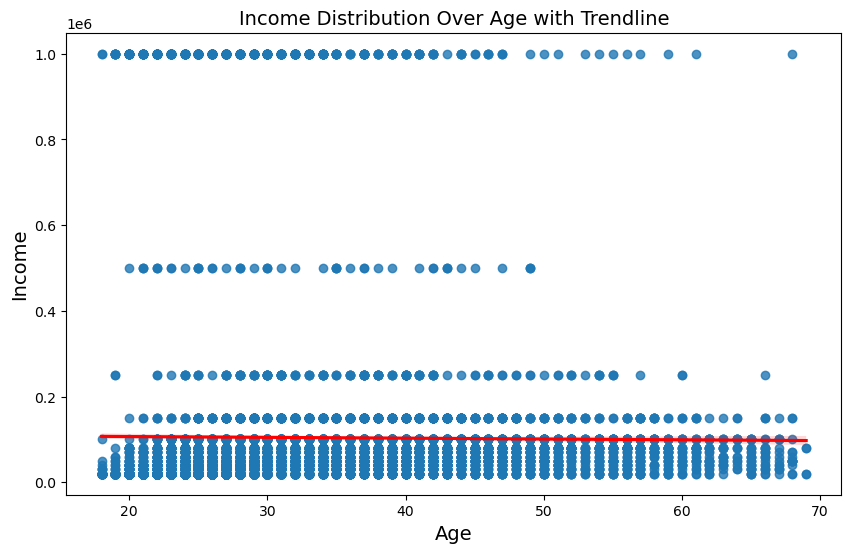

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df[df['income']>0], x='age', y='income', line_kws={'color': 'red'})
plt.xlabel('Age',fontsize =14)
plt.ylabel('Income',fontsize =14)
plt.title('Income Distribution Over Age with Trendline',fontsize =14)
plt.show()


A scatter plot was created using Seaborn's regplot to explore the relationship
between age and income. The result indicates that most users, regardless of age,
have similar income levels, with income not showing a clear increase as age
progresses.


## 2 . Create boxplots of income grouped by age_group. Which age group reports the highest median income?

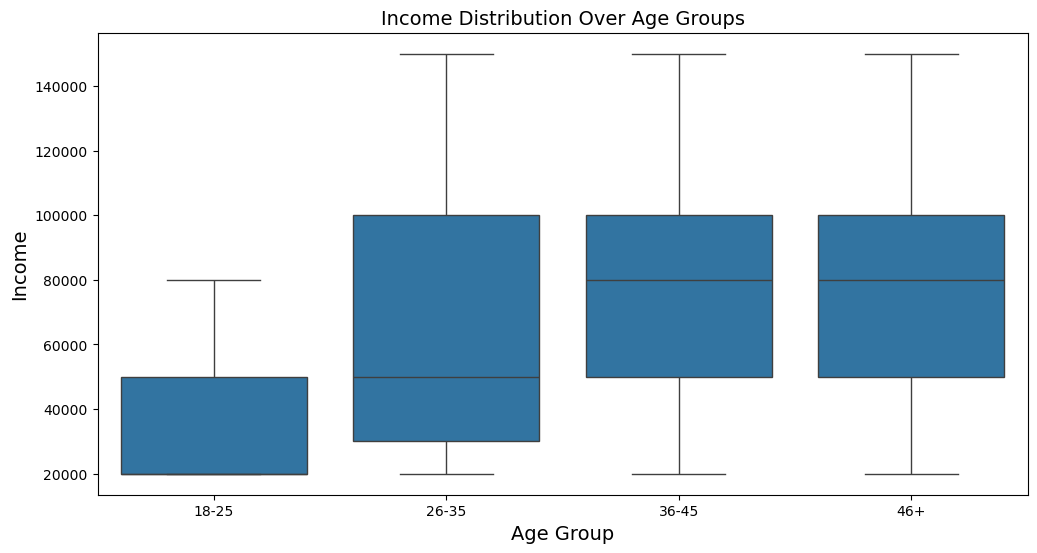

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['income'] > 0], x="age_group", y="income", showfliers=False)

plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.title("Income Distribution Over Age Groups", fontsize=14)

plt.show()


## 3 . 3.Analyze income levels within gender and status categories. For example, are single men more likely to report higher incomes than single women?


C:\Users\HP\AppData\Local\Temp\ipykernel_7800\2982830235.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="status", y="income", hue="gender", ci=None,palette="Reds")


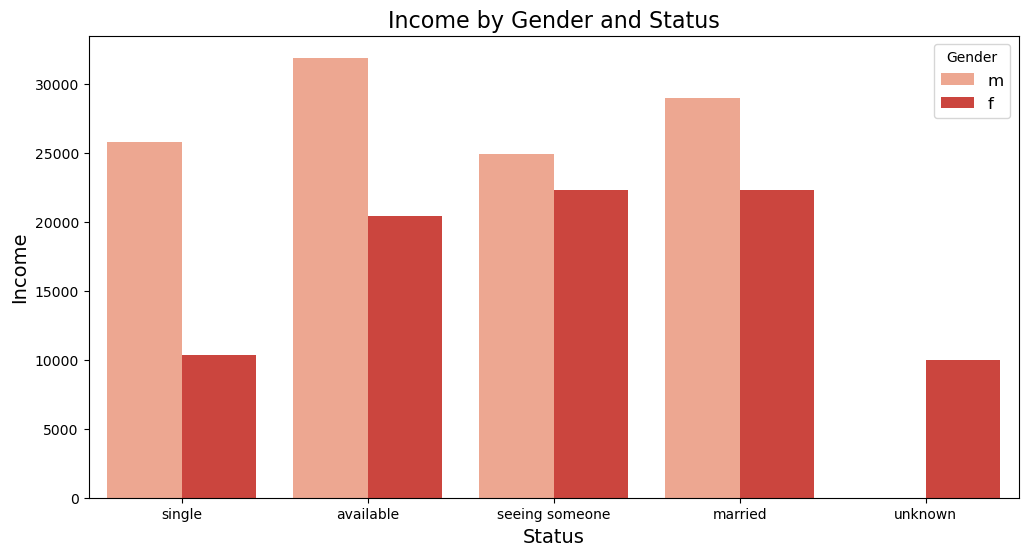

In [47]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="status", y="income", hue="gender", ci=None,palette="Reds")
plt.xlabel("Status", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.title("Income by Gender and Status", fontsize=16)
plt.legend(title="Gender", fontsize=12)
plt.show()

## 3 . Pets and Preferences
Pets are often a key lifestyle preference and compatibility factor. Analyzing how pets preferences distribute across demographics can provide insights for filters or recommendations.

## 1 . Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). Which preferences are most common?

C:\Users\HP\AppData\Local\Temp\ipykernel_7800\1773610153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["pets"].value_counts().index,


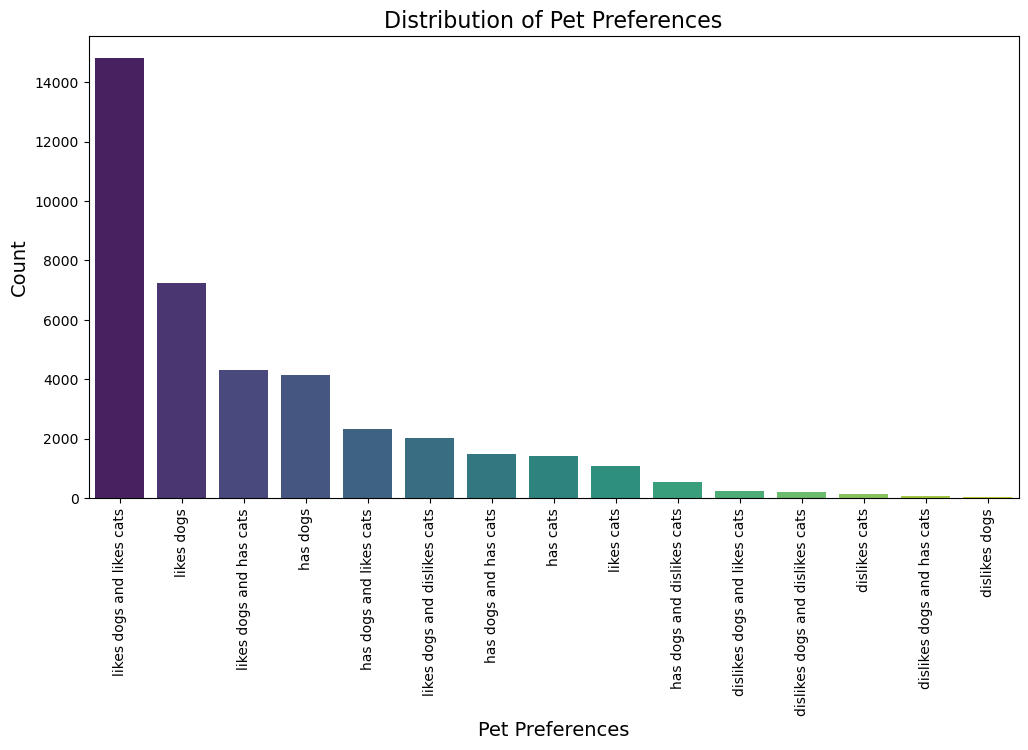

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["pets"].value_counts().index,
            y=df["pets"].value_counts().values,
            palette="viridis")

plt.xlabel("Pet Preferences", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Pet Preferences", fontsize=16)
plt.xticks(rotation=90)
plt.show()


- "Likes dogs and likes cats" is the most dominant category, indicating a strong preference for both pets.
- "Dislikes dogs" and "dislikes cats" are the least frequent, meaning most users have positive pet attitudes.

## 2 . How do pets preferences vary across gender and age_group? Are younger users more likely to report liking pets compared to older users?

C:\Users\HP\AppData\Local\Temp\ipykernel_7800\2559241296.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pet_distribution_by_group = df.groupby(['age_group', 'gender', 'pets']).size().reset_index(name="count")


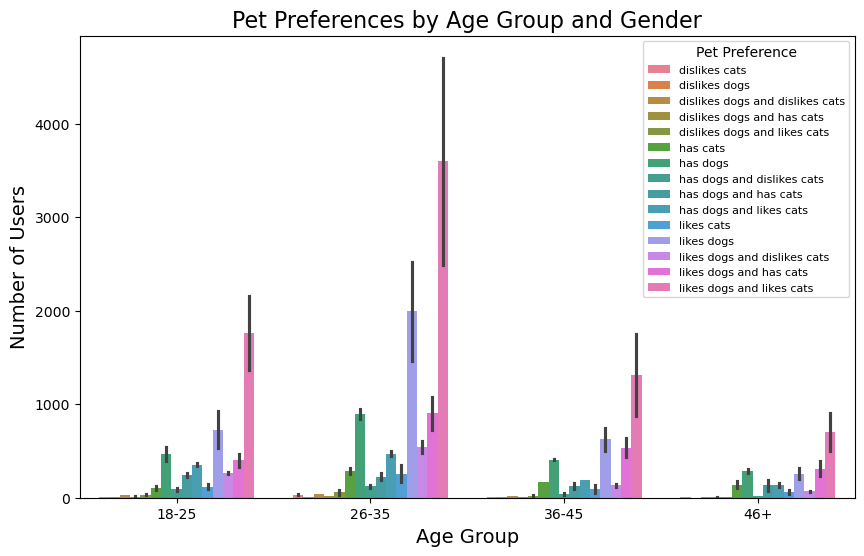

In [49]:
pet_distribution_by_group = df.groupby(['age_group', 'gender', 'pets']).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=pet_distribution_by_group, x="age_group", y="count", hue="pets")
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Pet Preferences by Age Group and Gender", fontsize=16)
plt.legend(title="Pet Preference", fontsize=8)
plt.show()



## 4 . 4. Signs and Personality
Users’ self-reported zodiac signs (sign) can offer insights into personality preferences or trends. While not scientifically grounded, analyzing this data helps explore fun and engaging patterns.

## 1 . Create a pie chart showing the distribution of zodiac signs (sign) across the platform. Which signs are most and least represented? Is this the right chart? If not, replace with right chart.

Text(0.5, 1.0, 'Distribution of Zodiac Signs')

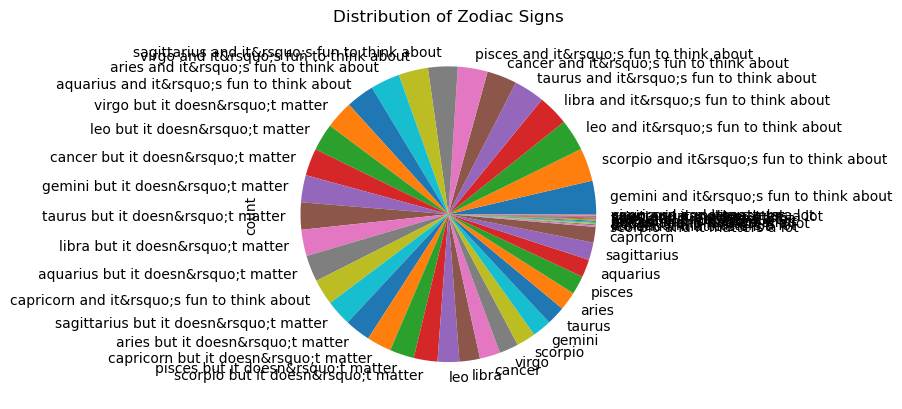

In [50]:

zodiac_counts = df["sign"].value_counts()
zodiac_counts.plot(kind='pie')
plt.title("Distribution of Zodiac Signs")


The pie chart does not provide clear insights, making it an unsuitable choice
for this representation.If we want a better comparison of sign popularity, a bar chart is clearer. 

C:\Users\HP\AppData\Local\Temp\ipykernel_7800\2906468300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df , x = "sign",palette="Reds")


Text(0.5, 1.0, 'Distribution of Zodiac Signs')

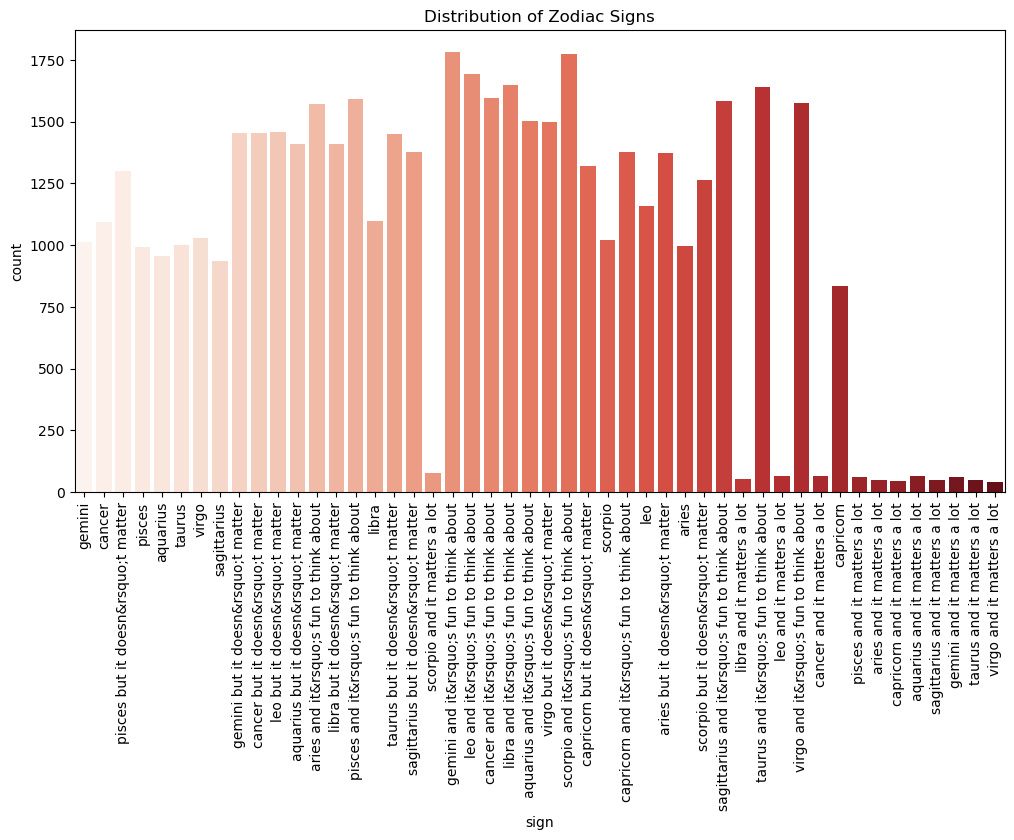

In [51]:

plt.figure(figsize=(12,6))
sns.countplot(data= df , x = "sign",palette="Reds")
plt.xticks(rotation = 90)
plt.title("Distribution of Zodiac Signs")


## 2 . How does sign vary across gender and status? Are there noticeable patterns or imbalances?

C:\Users\HP\AppData\Local\Temp\ipykernel_7800\1004284726.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=zodiac_distribution, x="sign", y="count", hue="gender", ci=None, palette="coolwarm")


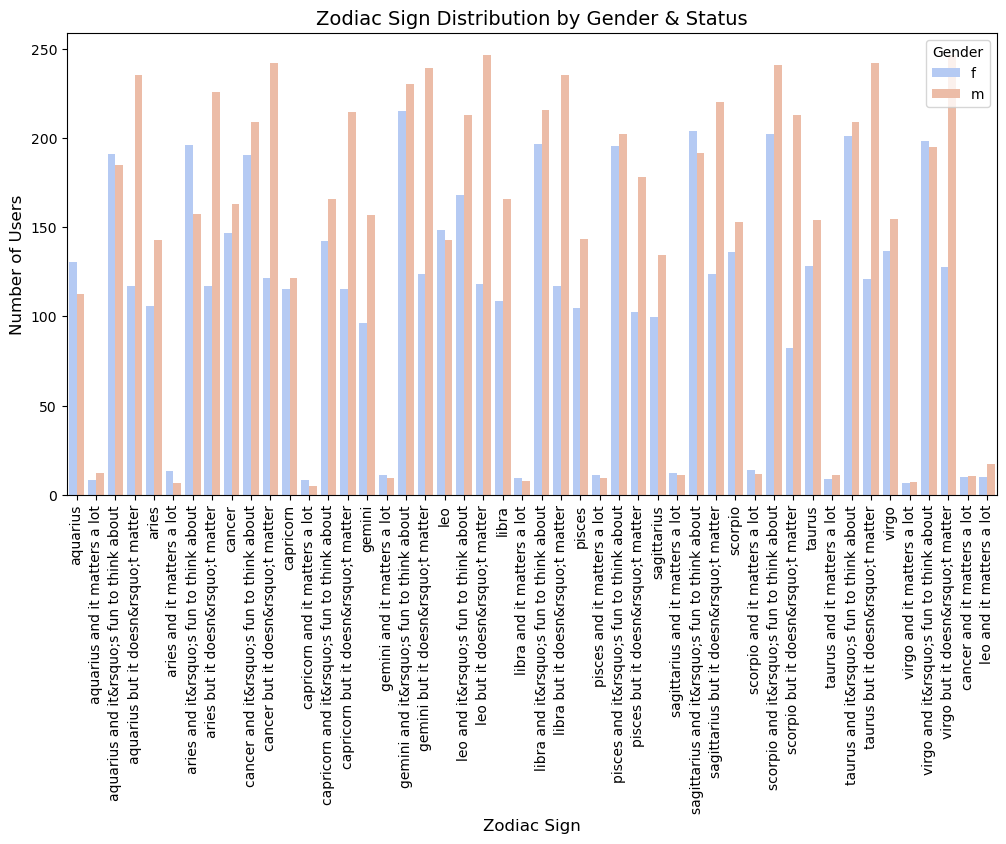

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


zodiac_distribution = df.groupby(["gender", "status", "sign"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.barplot(data=zodiac_distribution, x="sign", y="count", hue="gender", ci=None, palette="coolwarm")

plt.xlabel("Zodiac Sign", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Zodiac Sign Distribution by Gender & Status", fontsize=14)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.legend(title="Gender")
plt.show()


In [53]:
pip install pandoc

  Using cached pandoc-2.4-py3-none-any.whl
  Using cached plumbum-1.9.0-py3-none-any.whl.metadata (10 kB)
Using cached plumbum-1.9.0-py3-none-any.whl (127 kB)
Note: you may need to restart the kernel to use updated packages.
